In [1]:
from projecc import *
import astropy.units as u

Mstar1 = 1.5*u.Msun
Mstar2 = 0.3*u.Msun
kep = KeplersConstant(Mstar1,Mstar2)

Nsamples = 500
sma, ecc, inc, argp, lon, meananom = DrawOrbits(Nsamples)

In [3]:
pos, vel, acc = KeplerianToCartesian(sma,ecc,inc,argp,lon,meananom,kep, solvefunc = DanbySolve)
pos

<Quantity [[ 1.59709868e+00,  4.63769662e-01, -4.88002107e-01],
           [ 2.32033383e+01,  5.40805977e+01,  6.42644176e+00],
           [ 5.07029186e+01, -1.20582167e+02, -5.29487873e+02],
           ...,
           [ 9.35010106e+01,  3.10969338e+01, -2.65659680e+02],
           [-1.11271320e+02,  5.56170442e+01, -7.22259894e+01],
           [-4.63796455e+00, -7.66460649e+01, -5.61108408e+00]] AU>

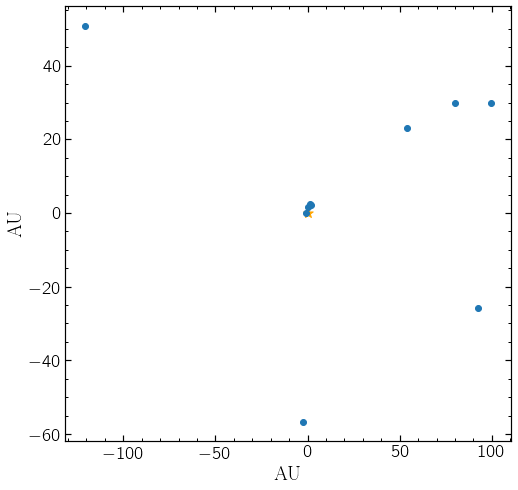

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(0,0, marker = '*', color='orange', s=100)
plt.scatter(pos[:10,1],pos[:10,0])
plt.xlabel('AU')
plt.ylabel('AU')
plt.show()

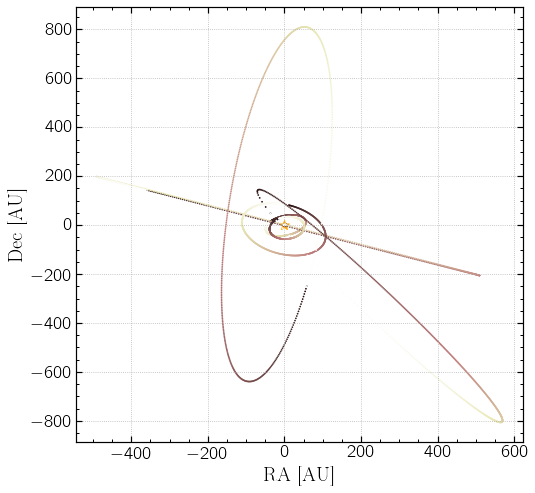

In [5]:
cmap = 'pink'
Npoints = 500
plt.figure(figsize = (8,8))
plt.scatter(0,0, marker = '*', color='orange', s=100)
for i in range(10):
    Xs, Ys = GetOrbitTracks(sma[i], ecc[i], inc[i], argp[i], lon[i], kep, Npoints = Npoints)
    taus = np.linspace(0,1,Npoints)
    plt.scatter(Ys, Xs, c=taus, cmap=cmap, s=3, lw=0)
plt.xlabel('RA [AU]')
plt.ylabel('Dec [AU]')
plt.grid(ls=':')
plt.show()



In [15]:
sep = 1.9e11*u.m
sep_au = sep.to(u.AU).value
print(period(sep,Mstar1+Mstar2))
print(period(sep_au,Mstar1+Mstar2))

1.0668565570887611
1.0668565570887611


In [2]:
Period = period(sma*u.AU,Mstar1+Mstar2)
t0 = MeanAnomToT0(meananom, Period, RefEpoch = 2016, AfterDate = 2016)
t0[0]

2634.1243550310683

In [3]:
r, phi = GetSepAndPA(Nsamples, Mstar1, Mstar2, DrawSMA = False, FixedSMA = 10.*u.AU)
r.shape,phi.shape

((500,), (500,))